In [15]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def load_history(filepath):
    data = pd.read_csv(filepath, sep="\s+", header=None)
    data.columns = ["timestep", "replica_idx", "temperature", "potential"]
    return data

def load_history_files(data_dir, filename_match="trimer_abeta42.job*.sort.history"):
    filepaths = glob.glob(os.path.join(data_dir, filename_match))
    #print("filepaths:", filepaths)
    dfs = []
    for filepath in filepaths:
        print("Loading:", filepath)
        df = load_history(filepath)
        dfs.append(df)
    
    df = pd.concat(dfs, axis=0, ignore_index=True)
    df = df.sort_values(by="timestep")
    return df


def histogram(x, **kwarg):
    hist, bin_edges = np.histogram(x, **kwarg)
    bin_centers = []
    for l, u in zip(bin_edges[:-1], bin_edges[1:]):
        bin_centers.append((l + u)*0.5)
    bin_centers = np.array(bin_centers)
    return hist, bin_centers

In [3]:
DATA_DIR = "/home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns"

In [4]:
df_0 = load_history_files(os.path.join(DATA_DIR, "0"), filename_match="trimer_abeta42.job*.sort.history")
df_2 = load_history_files(os.path.join(DATA_DIR, "2"), filename_match="trimer_abeta42.job*.sort.history")
df_4 = load_history_files(os.path.join(DATA_DIR, "4"), filename_match="trimer_abeta42.job*.sort.history")
df_6 = load_history_files(os.path.join(DATA_DIR, "6"), filename_match="trimer_abeta42.job*.sort.history")
df_8 = load_history_files(os.path.join(DATA_DIR, "8"), filename_match="trimer_abeta42.job*.sort.history")
df_10 = load_history_files(os.path.join(DATA_DIR, "10"), filename_match="trimer_abeta42.job*.sort.history")
df_12 = load_history_files(os.path.join(DATA_DIR, "12"), filename_match="trimer_abeta42.job*.sort.history")
df_14 = load_history_files(os.path.join(DATA_DIR, "14"), filename_match="trimer_abeta42.job*.sort.history")
df_15 = load_history_files(os.path.join(DATA_DIR, "15"), filename_match="trimer_abeta42.job*.sort.history")


hist_0, bin_center_0 = histogram(df_0["potential"], bins=100, density=True)
hist_2, bin_center_2 = histogram(df_2["potential"], bins=100, density=True)
hist_4, bin_center_4 = histogram(df_4["potential"], bins=100, density=True)
hist_6, bin_center_6 = histogram(df_6["potential"], bins=100, density=True)
hist_8, bin_center_8 = histogram(df_8["potential"], bins=100, density=True)
hist_10, bin_center_10 = histogram(df_10["potential"], bins=100, density=True)
hist_12, bin_center_12 = histogram(df_12["potential"], bins=100, density=True)
hist_14, bin_center_14 = histogram(df_14["potential"], bins=100, density=True)
hist_15, bin_center_15 = histogram(df_15["potential"], bins=100, density=True)


Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job3.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job5.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job9.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job1.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job7.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job6.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job8.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job0.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_ab

Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job8.15.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job5.15.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job7.15.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job9.15.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job6.15.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job3.15.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/15/trimer_abeta42.job4.15.sort.history


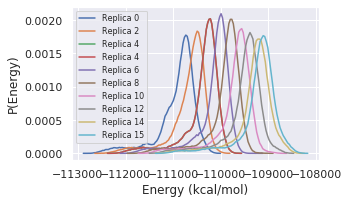

In [16]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
ax.plot(bin_center_0, hist_0, label="Replica 0")
ax.plot(bin_center_2, hist_2, label="Replica 2")
ax.plot(bin_center_4, hist_4, label="Replica 4")
ax.plot(bin_center_4, hist_4, label="Replica 4")
ax.plot(bin_center_6, hist_6, label="Replica 6")
ax.plot(bin_center_8, hist_8, label="Replica 8")
ax.plot(bin_center_10, hist_10, label="Replica 10")
ax.plot(bin_center_12, hist_12, label="Replica 12")
ax.plot(bin_center_14, hist_14, label="Replica 14")
ax.plot(bin_center_15, hist_15, label="Replica 15")
ax.legend(fontsize=8)

ax.set_xlabel("Energy (kcal/mol)")
ax.set_ylabel("P(Energy)")
plt.tight_layout()
plt.savefig("potential_energy_histogram.pdf", dpi=600)

In [ ]:
df_0["potential"].plot(kind="hist")
df_2["potential"].plot(kind="hist")

In [ ]:
hist_0, bin_center_0 = histogram(df_0["potential"], bins=100, density=True)

In [ ]:
len(hist_0), len(bin_center_0)

In [ ]:
plt.plot(bin_edge_0[:-1], hist_0)

In [ ]:
np.histogram?